### Compute Drawdowns

/var/folders/_z/ygd5g3hj0b12_9kkctx993l80000gn/T/ipykernel_10250/2715145603.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', index_col=0, parse_dates=True,


<Axes: >

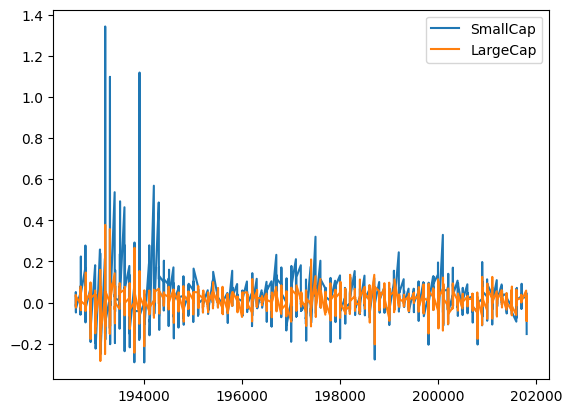

In [1]:
import pandas as pd
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', index_col=0, parse_dates=True,
                   header=0, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap'] 
rets = rets / 100
rets.plot.line()


In [5]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.head()
rets.index = rets.index.to_period('M')
rets.head()


,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [10]:
rets["1975":"1977"]

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


## Compute Drawdowns
1. Compute Wealth index
2. Compute previous peaks
3. Compute drawdowns

In [11]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

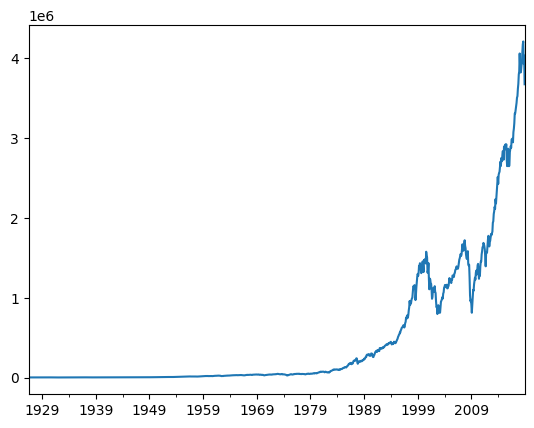

In [12]:
wealth_index.plot.line()

<Axes: >

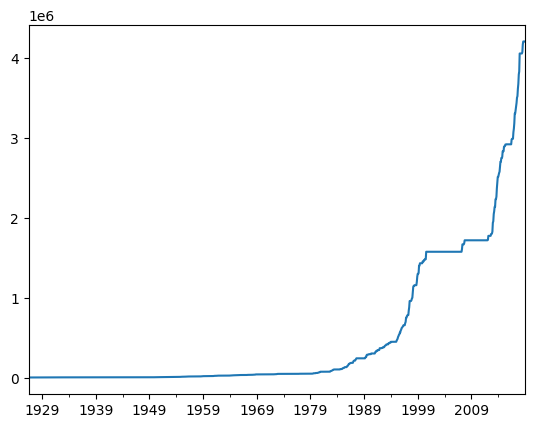

In [13]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

<Axes: >

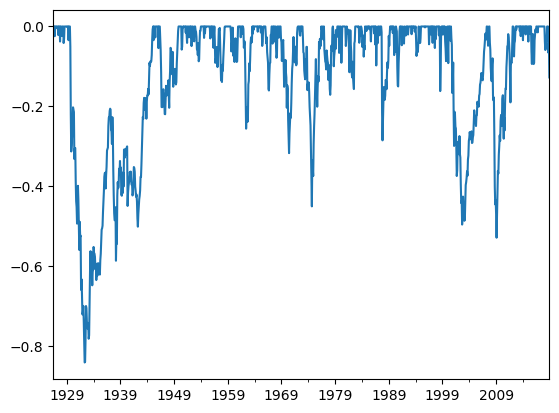

In [14]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot.line()

In [15]:
drawdown.min()

-0.8400375277943123

In [16]:
drawdown.idxmin()

Period('1932-05', 'M')

In [19]:
drawdown['1975':].min()

-0.5280945042309304

In [20]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [24]:
def drawdown(r: pd.Series) -> pd.DataFrame:
    """
    :param r: time series of asset returns to compute drawdown
    :return: data frame with wealth index, previous peaks, percent drawdowns
    """
    wealth_index = 1000*(1+r).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame( {
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown': drawdowns
    })

In [25]:
drawdown(rets['LargeCap'])

,Wealth,Peaks,Drawdown
1926-07,1.032900e+03,1.032900e+03,0.000000
1926-08,1.071117e+03,1.071117e+03,0.000000
1926-09,1.078294e+03,1.078294e+03,0.000000
1926-10,1.052091e+03,1.078294e+03,-0.024300
1926-11,1.080498e+03,1.080498e+03,0.000000
...,...,...,...
2018-08,4.175915e+06,4.175915e+06,0.000000
2018-09,4.212246e+06,4.212246e+06,0.000000
2018-10,3.935501e+06,4.212246e+06,-0.065700
2018-11,4.035069e+06,4.212246e+06,-0.042062


<Axes: >

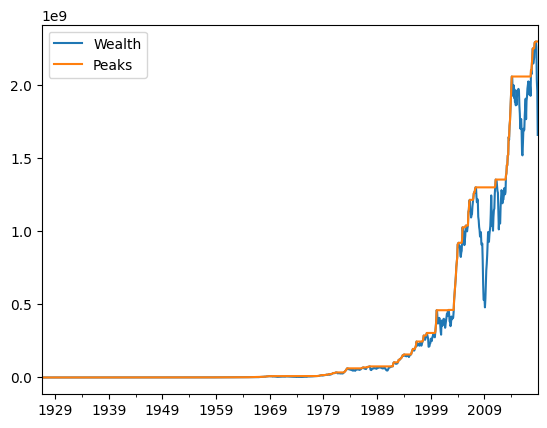

In [26]:
drawdown(rets['SmallCap'])[['Wealth', 'Peaks']].plot()

<Axes: >

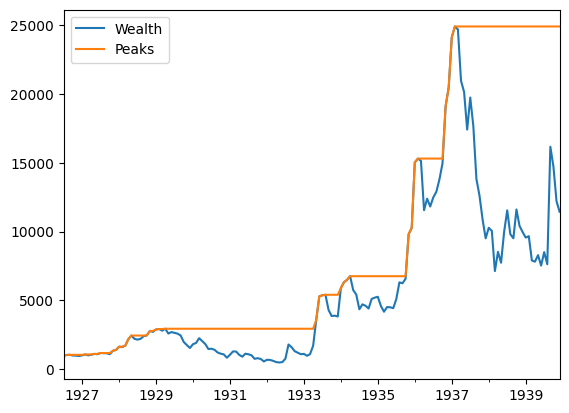

In [29]:
drawdown(rets['SmallCap'][:'1939'])[['Wealth', 'Peaks']].plot()


In [30]:
%load_ext autoreload
%autoreload 2